In [1]:
import matplotlib.pyplot as plt

In [2]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

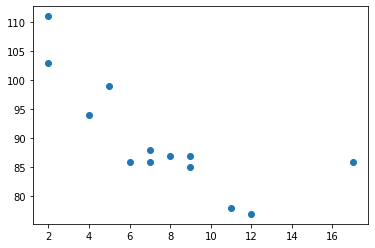

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from scipy import stats

In [5]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

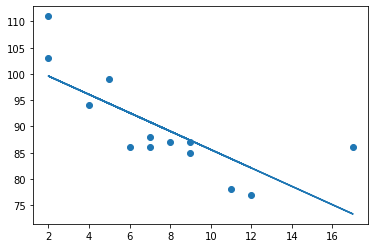

In [6]:
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [18]:
print(x)
print(x[9])
print(y[9])

[5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
11
78


In [14]:
#predicting the speed of 7 year old car
print(f"Speed of 7 year old car is: {round(myfunc(7),0)}")
print(f"Speed of 10 year old car is: {round(myfunc(10),0)}")


Speed of 7 year old car is: 91.0
Speed of 10 year old car is: 86.0


BAD FIT

In [19]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

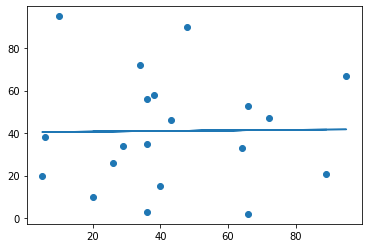

In [20]:
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [21]:
print(r)

0.01331814154297491


In [22]:
import pandas as pd

In [43]:
df = pd.read_csv("TSLA.csv")

In [24]:
df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500


In [26]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,289.108428,297.288412,280.697937,289.997067,289.997067,7.530795e+07
std,167.665389,171.702889,163.350196,168.995613,168.995613,4.013706e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.735770e+07
25%,148.367996,154.990005,143.222000,149.792007,149.792007,4.713450e+07
50%,244.296005,245.600006,237.119995,241.731995,241.731995,7.025550e+07
75%,421.390015,430.500000,410.579987,421.200012,421.200012,9.454550e+07
max,699.989990,718.719971,691.119995,705.669983,705.669983,3.046940e+08


In [44]:
#Converting Date column to index
df.set_index(pd.DatetimeIndex(df['Date']), inplace = True)

In [45]:
df = df[['Adj Close']]


<AxesSubplot:xlabel='Date'>

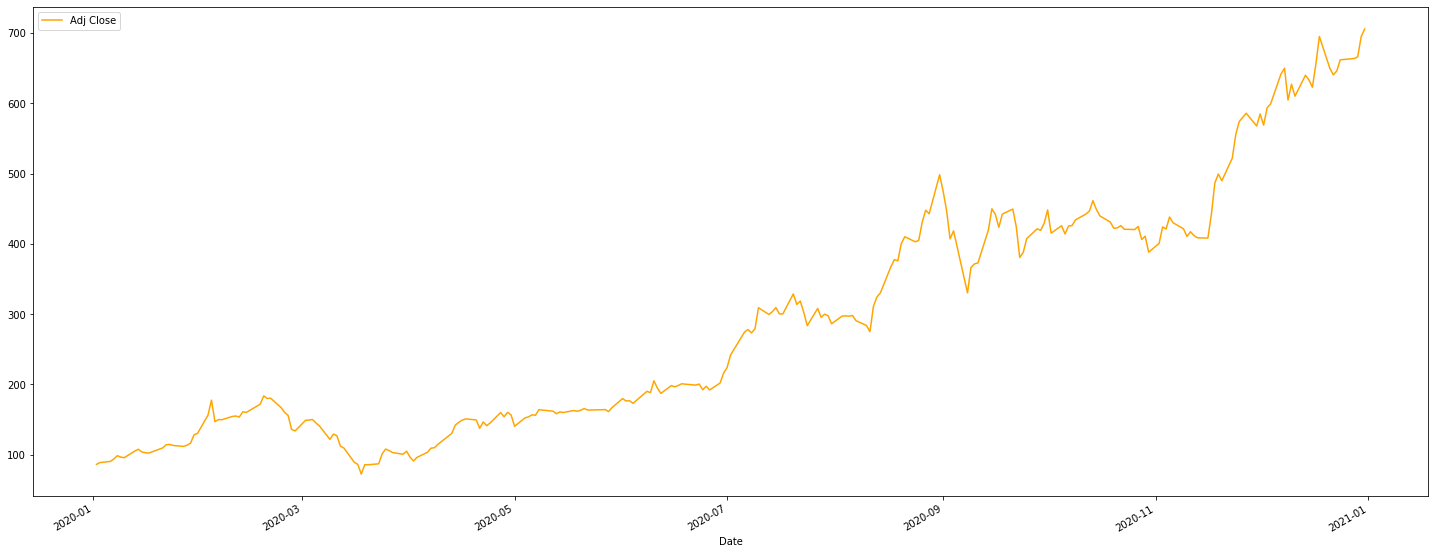

In [35]:
df.plot(color = 'orange', figsize = (25,10))

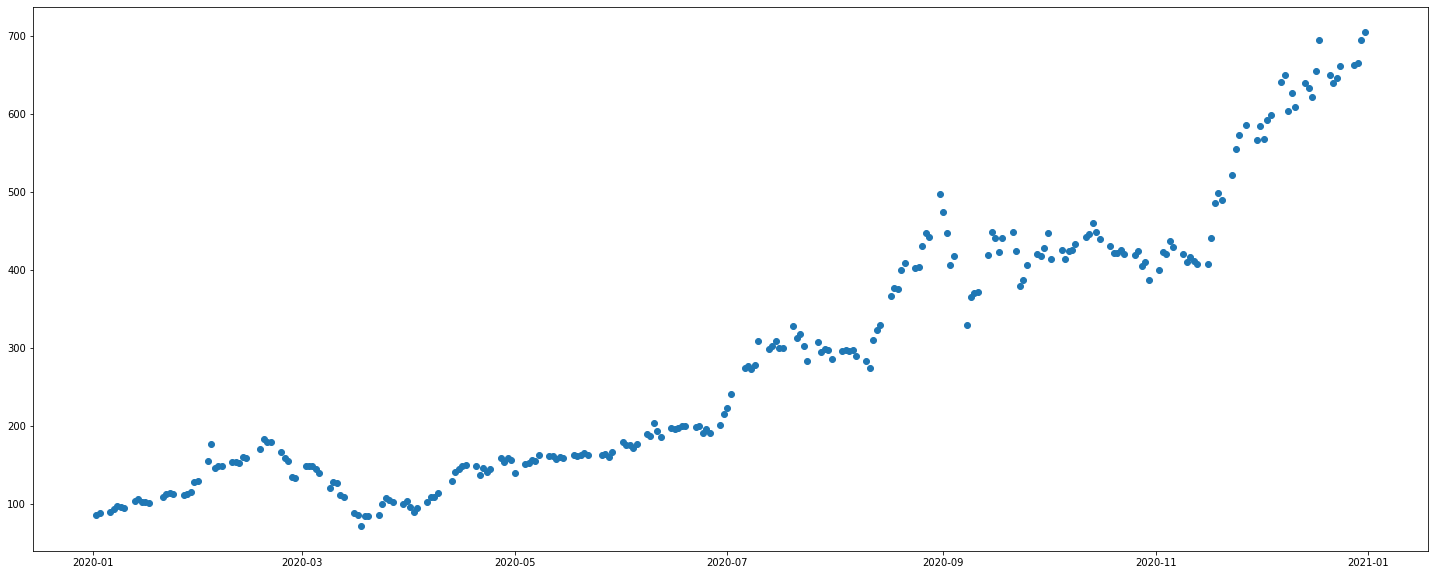

In [39]:
plt.figure(figsize = (25, 10))
plt.scatter(df.index, df[['Adj Close']])

In [46]:
import pandas_ta

In [50]:
df.rename(columns = {'Adj Close':'adj_close'}, inplace = True)

In [51]:
df.ta.ema(close = 'adj_close', length = 10, append = True)

Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
                 ...    
2020-12-24    643.572394
2020-12-28    647.230141
2020-12-29    650.641022
2020-12-30    658.666296
2020-12-31    667.212421
Name: EMA_10, Length: 253, dtype: float64

In [52]:
df = df.iloc[10:]

In [55]:
df.reset_index(inplace = True)

<AxesSubplot:xlabel='Date'>

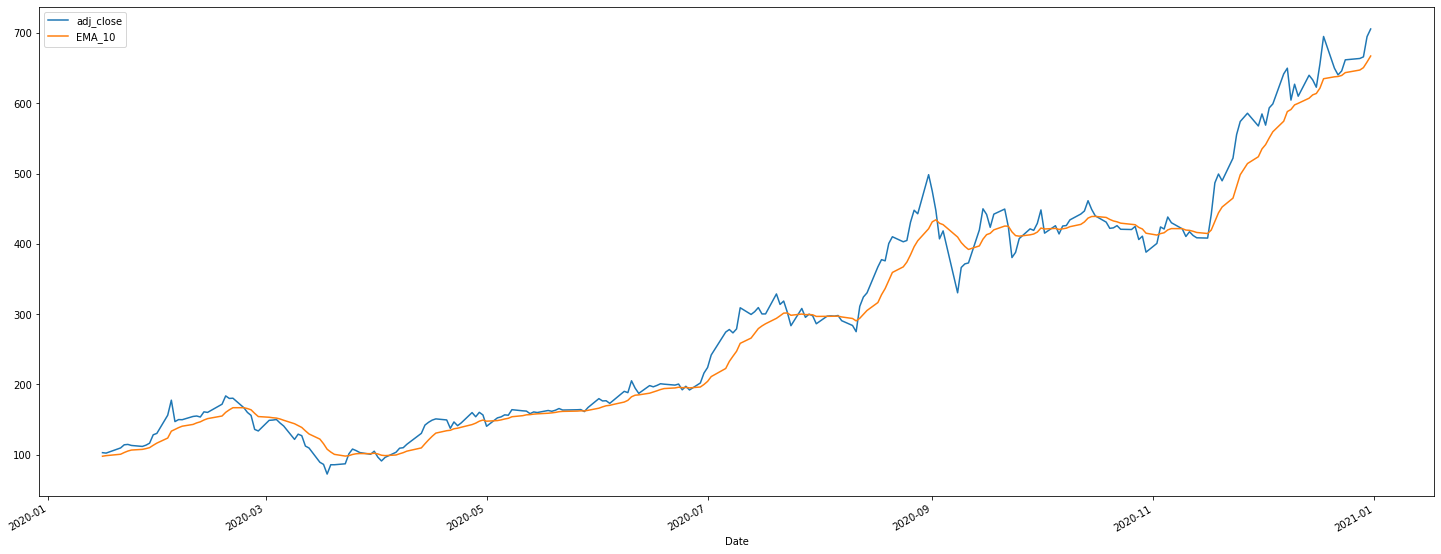

In [60]:
df.plot(x = "Date", y = ['adj_close', 'EMA_10'], figsize = (25, 10))

In [61]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace = True)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(df[['adj_close']], df[['EMA_10']], test_size = 0.2)

In [64]:
x_train.describe()

,adj_close
count,194.000000
mean,292.978639
std,164.371363
min,72.244003
25%,154.411000
50%,274.597001
75%,421.245011
max,705.669983


In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [67]:
y_pred = model.predict(x_test)

In [68]:
#to check the score
model.score(x_test, y_test)

0.9902412672006471

Formula for Polynomial regression
1. y = b0 + b1x1 + b2(square of x2) + b3(cube of x3) + ....... + bn(nth power of xn)


Formula For Multiple Linear Regression
1. y = b0 + b1x1 + b2x2+ b3x3 + ............. +bnxn